In [7]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [8]:
sample = pd.read_csv("/content/sample_submission.csv")
store = pd.read_csv("/content/store.csv")
test = pd.read_csv("/content/test.csv")
train = pd.read_csv("/content/train.csv")

<ipython-input-8-841d3250dffd>:4: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  train = pd.read_csv("/content/train.csv")


In [9]:
sample.head()

,Id,Sales
0,1,0
1,2,0
2,3,0
3,4,0
4,5,0


In [10]:
store.head()

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN


In [11]:
test.head()

,Id,Store,DayOfWeek,Date,Open,Promo,StateHoliday,SchoolHoliday
0,1,1,4,2015-09-17,1.0,1,0,0
1,2,3,4,2015-09-17,1.0,1,0,0
2,3,7,4,2015-09-17,1.0,1,0,0
3,4,8,4,2015-09-17,1.0,1,0,0
4,5,9,4,2015-09-17,1.0,1,0,0


In [12]:
train.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1


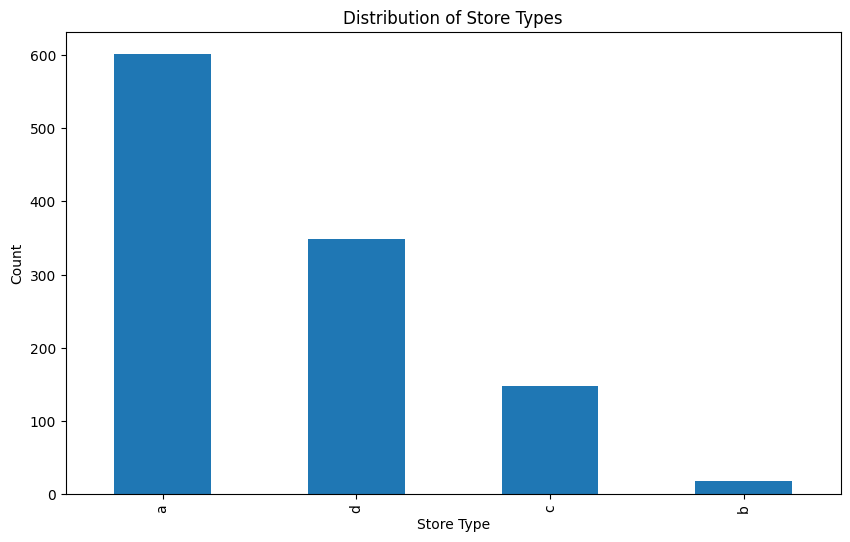

In [13]:
# Visualize store types distribution
plt.figure(figsize=(10, 6))
store['StoreType'].value_counts().plot(kind='bar')
plt.title('Distribution of Store Types')
plt.xlabel('Store Type')
plt.ylabel('Count')
plt.show()

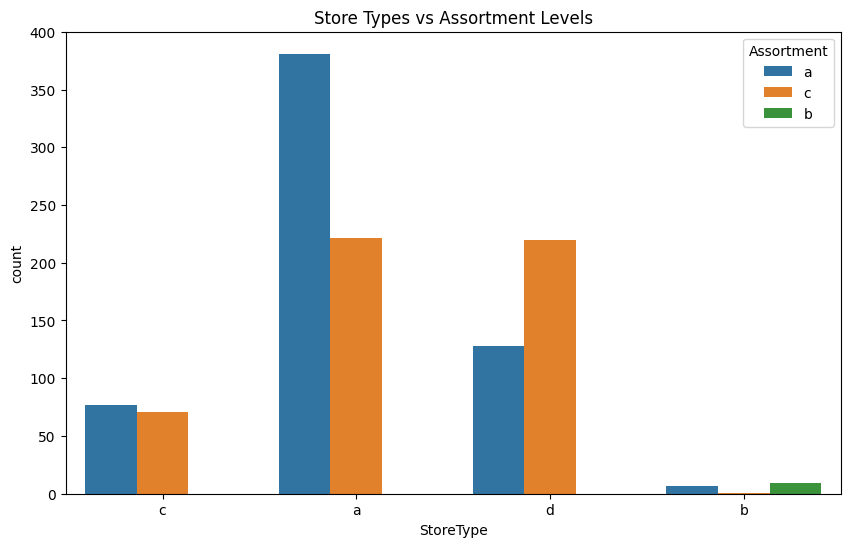

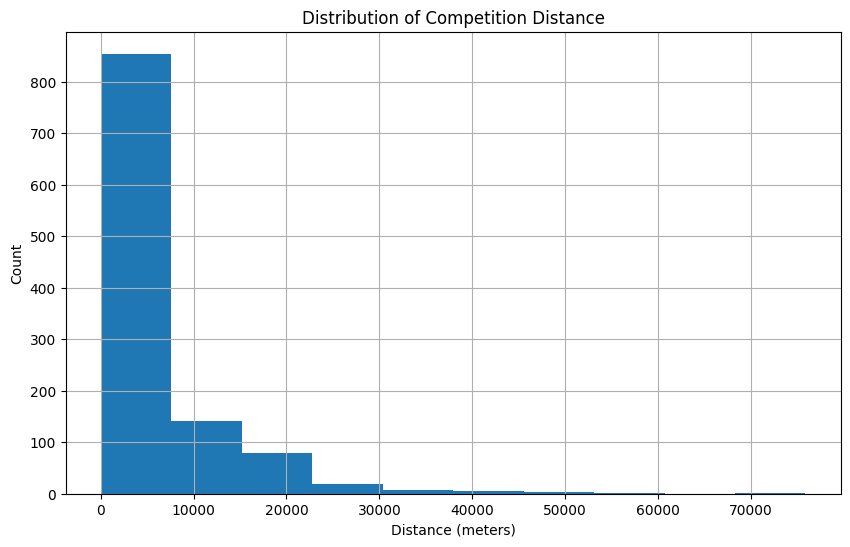

In [14]:
# Visualize relationship between StoreType and Assortment
plt.figure(figsize=(10, 6))
sns.countplot(data=store, x='StoreType', hue='Assortment')
plt.title('Store Types vs Assortment Levels')
plt.show()

# Distribution of Competition Distance
plt.figure(figsize=(10, 6))
store['CompetitionDistance'].hist()
plt.title('Distribution of Competition Distance')
plt.xlabel('Distance (meters)')
plt.ylabel('Count')
plt.show()

Number of null values in each column:
CompetitionDistance            3
CompetitionOpenSinceMonth    354
CompetitionOpenSinceYear     354
Promo2SinceWeek              544
Promo2SinceYear              544
PromoInterval                544
dtype: int64

Percentage of null values in each column:
CompetitionDistance           0.269058
CompetitionOpenSinceMonth    31.748879
CompetitionOpenSinceYear     31.748879
Promo2SinceWeek              48.789238
Promo2SinceYear              48.789238
PromoInterval                48.789238
dtype: float64


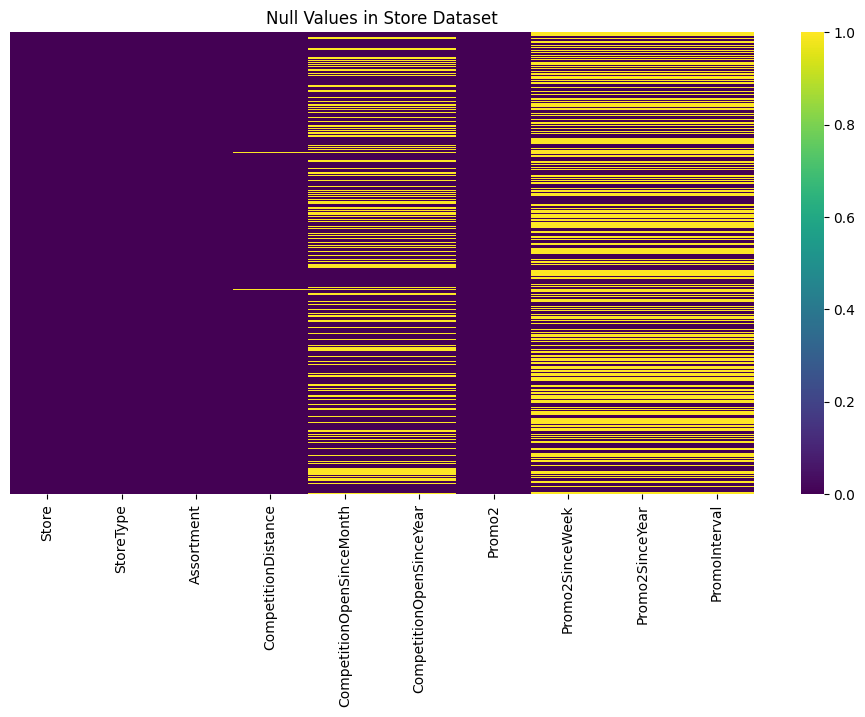

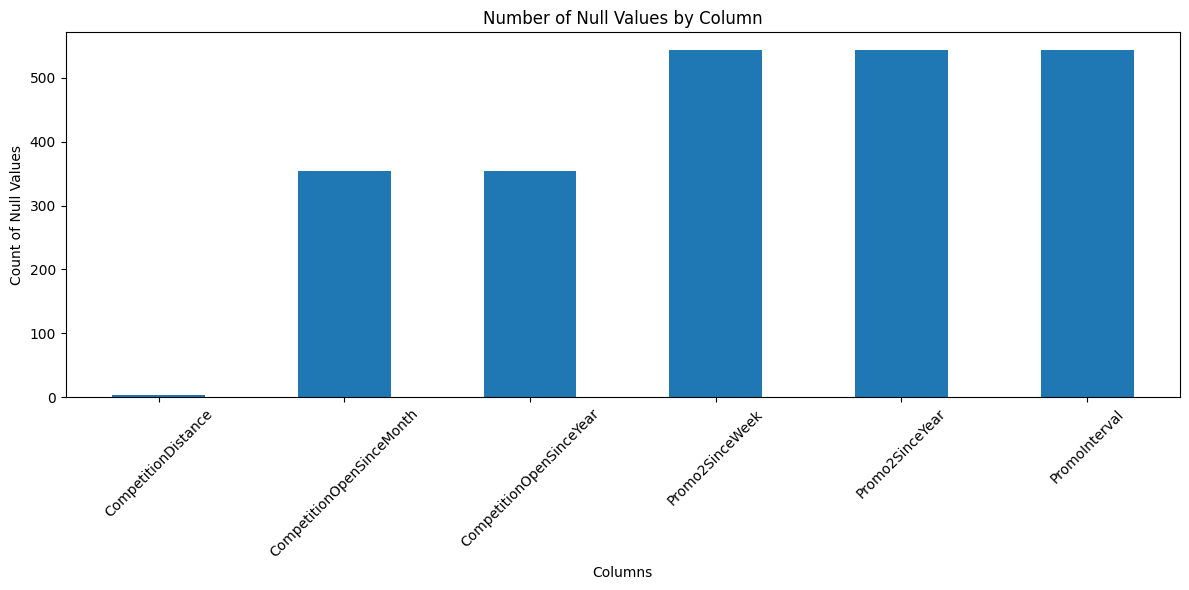

In [15]:
# Check for null values
null_values = store.isnull().sum()
print("Number of null values in each column:")
print(null_values[null_values > 0])

# Calculate percentage of null values
null_percentage = (store.isnull().sum() / len(store)) * 100
print("\nPercentage of null values in each column:")
print(null_percentage[null_percentage > 0])

# Visualize null values
plt.figure(figsize=(12, 6))
sns.heatmap(store.isnull(), yticklabels=False, cbar=True, cmap='viridis')
plt.title('Null Values in Store Dataset')
plt.show()

# Bar plot of null value counts
plt.figure(figsize=(12, 6))
null_values[null_values > 0].plot(kind='bar')
plt.title('Number of Null Values by Column')
plt.xlabel('Columns')
plt.ylabel('Count of Null Values')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [16]:
store['CompetitionDistance'].fillna(store['CompetitionDistance'].median(), inplace=True)

store['CompetitionOpenSinceMonth'].fillna(store['CompetitionOpenSinceMonth'].mode()[0], inplace=True)
store['CompetitionOpenSinceYear'].fillna(store['CompetitionOpenSinceYear'].mode()[0], inplace=True)

store['Promo2SinceWeek'].fillna(0, inplace=True)
store['Promo2SinceYear'].fillna(0, inplace=True)
store['PromoInterval'].fillna('None', inplace=True)

print("Remaining null values:")
print(store.isnull().sum()[store.isnull().sum() > 0])

Remaining null values:
Series([], dtype: int64)


<ipython-input-16-502241c88fae>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  store['CompetitionDistance'].fillna(store['CompetitionDistance'].median(), inplace=True)
<ipython-input-16-502241c88fae>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col

In [17]:
train.describe(), train.info(), train.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017209 entries, 0 to 1017208
Data columns (total 9 columns):
 #   Column         Non-Null Count    Dtype 
---  ------         --------------    ----- 
 0   Store          1017209 non-null  int64 
 1   DayOfWeek      1017209 non-null  int64 
 2   Date           1017209 non-null  object
 3   Sales          1017209 non-null  int64 
 4   Customers      1017209 non-null  int64 
 5   Open           1017209 non-null  int64 
 6   Promo          1017209 non-null  int64 
 7   StateHoliday   1017209 non-null  object
 8   SchoolHoliday  1017209 non-null  int64 
dtypes: int64(7), object(2)
memory usage: 69.8+ MB


(              Store     DayOfWeek         Sales     Customers          Open  \
 count  1.017209e+06  1.017209e+06  1.017209e+06  1.017209e+06  1.017209e+06   
 mean   5.584297e+02  3.998341e+00  5.773819e+03  6.331459e+02  8.301067e-01   
 std    3.219087e+02  1.997391e+00  3.849926e+03  4.644117e+02  3.755392e-01   
 min    1.000000e+00  1.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   
 25%    2.800000e+02  2.000000e+00  3.727000e+03  4.050000e+02  1.000000e+00   
 50%    5.580000e+02  4.000000e+00  5.744000e+03  6.090000e+02  1.000000e+00   
 75%    8.380000e+02  6.000000e+00  7.856000e+03  8.370000e+02  1.000000e+00   
 max    1.115000e+03  7.000000e+00  4.155100e+04  7.388000e+03  1.000000e+00   
 
               Promo  SchoolHoliday  
 count  1.017209e+06   1.017209e+06  
 mean   3.815145e-01   1.786467e-01  
 std    4.857586e-01   3.830564e-01  
 min    0.000000e+00   0.000000e+00  
 25%    0.000000e+00   0.000000e+00  
 50%    0.000000e+00   0.000000e+00  
 75%    1.00

In [18]:
train.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1


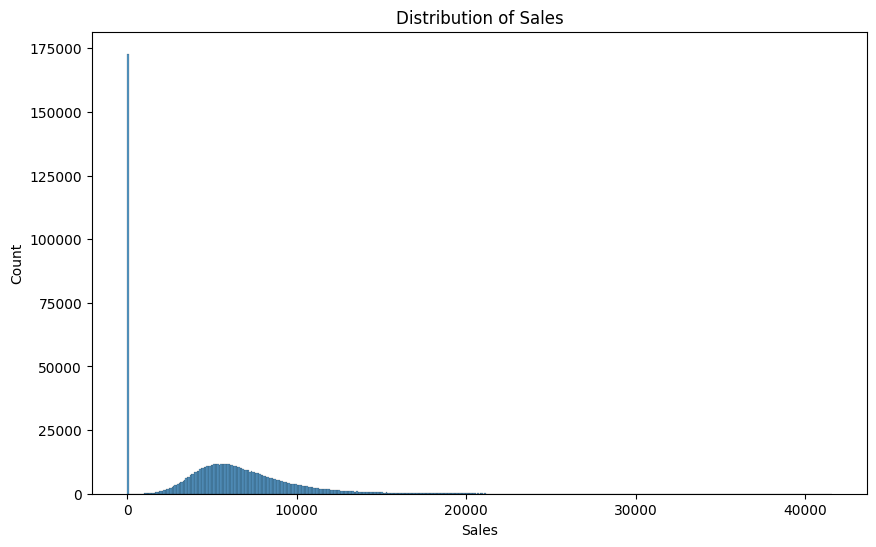

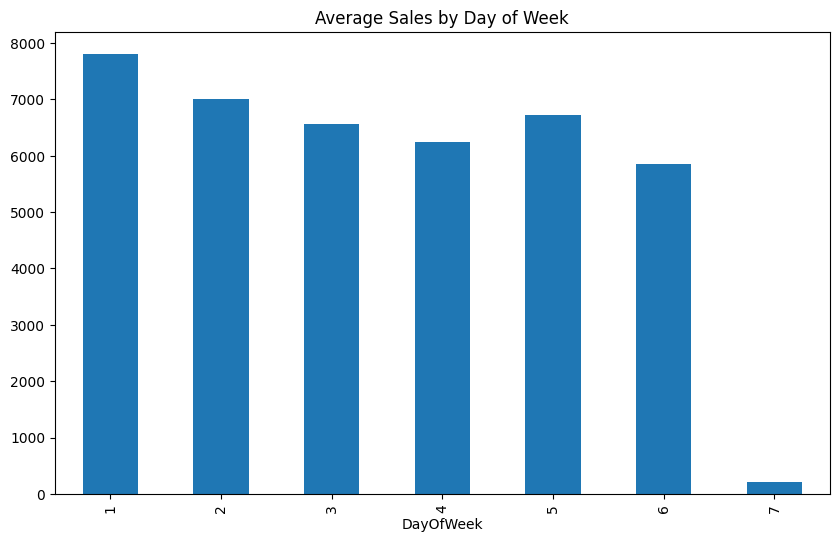

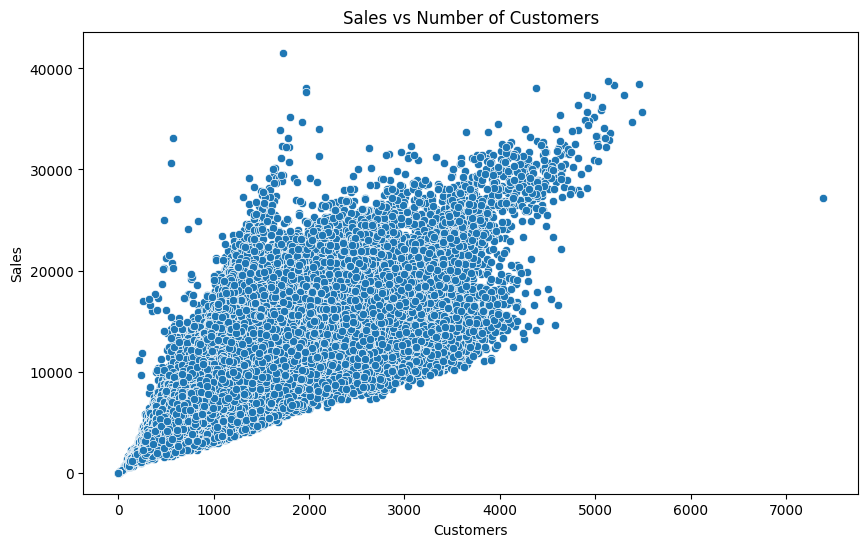

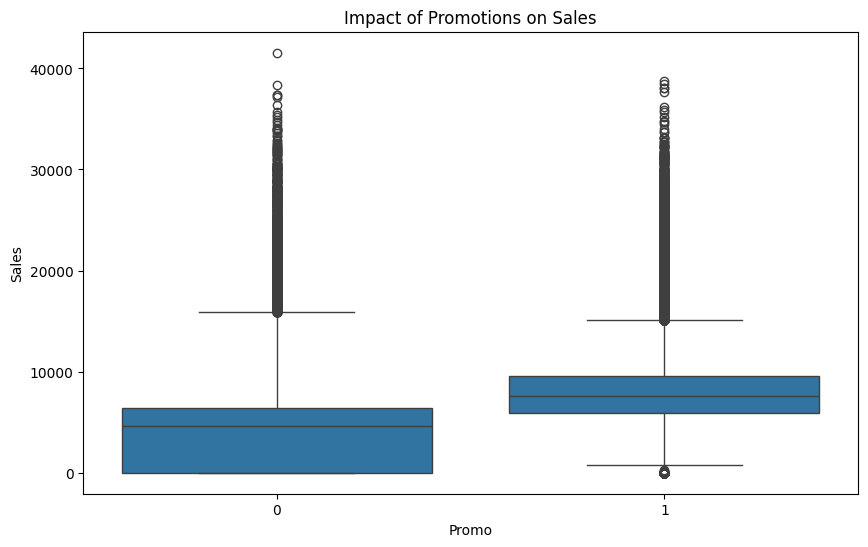

In [19]:
# Sales distribution
plt.figure(figsize=(10, 6))
sns.histplot(data=train, x='Sales')
plt.title('Distribution of Sales')
plt.show()

# Average sales by day of week
plt.figure(figsize=(10, 6))
train.groupby('DayOfWeek')['Sales'].mean().plot(kind='bar')
plt.title('Average Sales by Day of Week')
plt.show()

# Sales vs Customers correlation
plt.figure(figsize=(10, 6))
sns.scatterplot(data=train, x='Customers', y='Sales')
plt.title('Sales vs Number of Customers')
plt.show()

# Impact of promotions on sales
plt.figure(figsize=(10, 6))
sns.boxplot(data=train, x='Promo', y='Sales')
plt.title('Impact of Promotions on Sales')
plt.show()

In [20]:
print("Store dataset shape:", store.shape)
print("Train dataset shape:", train.shape)

print("\nUnique stores in train dataset:", train['Store'].nunique())
print("Total stores in store dataset:", len(store))

Store dataset shape: (1115, 10)
Train dataset shape: (1017209, 9)

Unique stores in train dataset: 1115
Total stores in store dataset: 1115


Original Train Shape: (1017209, 9)
Original Store Shape: (1115, 10)
Merged DataFrame Shape: (1017209, 18)

First few rows of merged dataset:
   Store  DayOfWeek        Date  Sales  Customers  Open  Promo StateHoliday  \
0      1          5  2015-07-31   5263        555     1      1            0   
1      2          5  2015-07-31   6064        625     1      1            0   
2      3          5  2015-07-31   8314        821     1      1            0   
3      4          5  2015-07-31  13995       1498     1      1            0   
4      5          5  2015-07-31   4822        559     1      1            0   

   SchoolHoliday StoreType Assortment  CompetitionDistance  \
0              1         c          a               1270.0   
1              1         a          a                570.0   
2              1         a          a              14130.0   
3              1         c          c                620.0   
4              1         a          a              29910.0   

   Competit

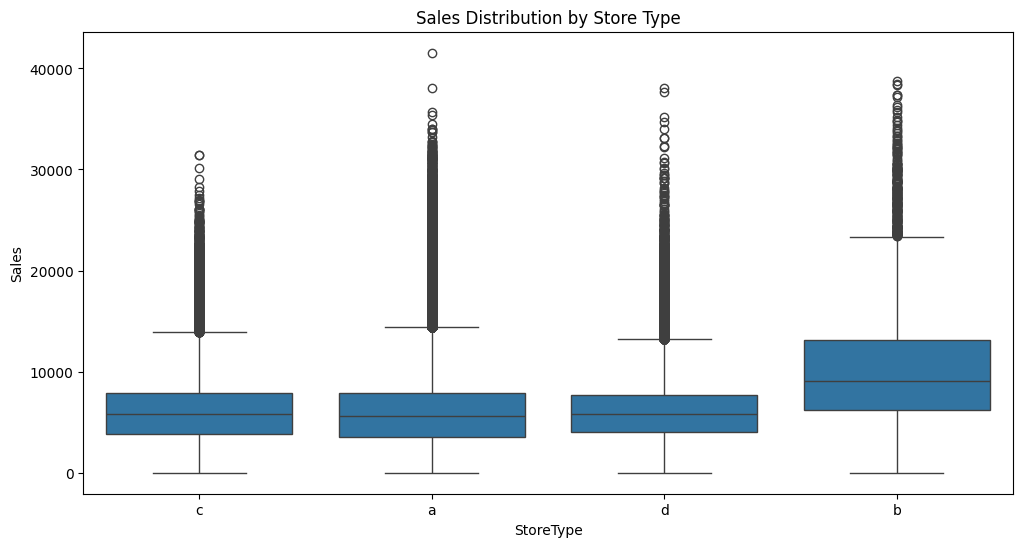

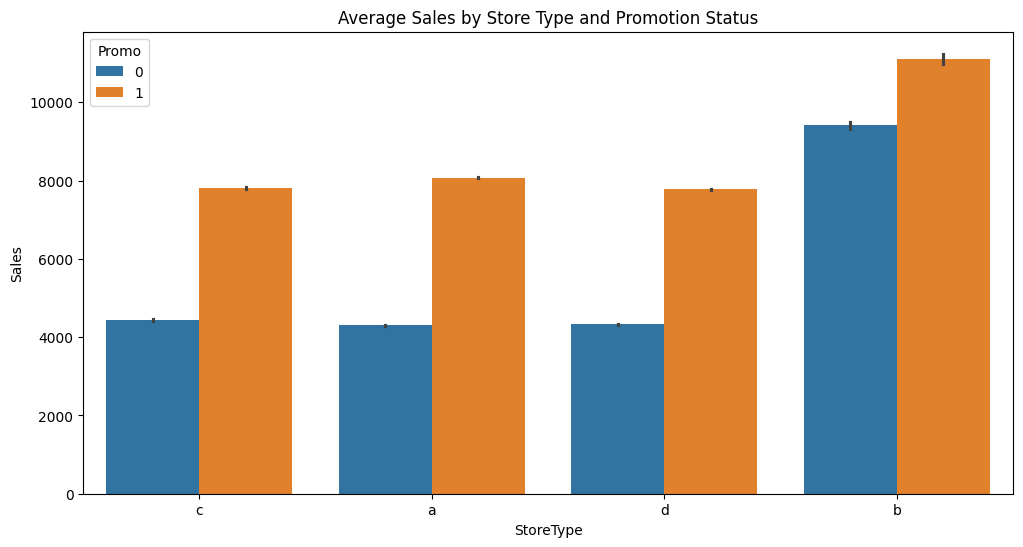

In [21]:
merged_df = pd.merge(train, store, on='Store', how='left')

print("Original Train Shape:", train.shape)
print("Original Store Shape:", store.shape)
print("Merged DataFrame Shape:", merged_df.shape)

print("\nFirst few rows of merged dataset:")
print(merged_df.head())

plt.figure(figsize=(12, 6))
sns.boxplot(data=merged_df, x='StoreType', y='Sales')
plt.title('Sales Distribution by Store Type')
plt.show()

plt.figure(figsize=(12, 6))
sns.barplot(data=merged_df, x='StoreType', y='Sales', hue='Promo')
plt.title('Average Sales by Store Type and Promotion Status')
plt.show()

In [22]:
merged_df.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,5,2015-07-31,5263,555,1,1,0,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,None
1,2,5,2015-07-31,6064,625,1,1,0,1,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,5,2015-07-31,8314,821,1,1,0,1,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,5,2015-07-31,13995,1498,1,1,0,1,c,c,620.0,9.0,2009.0,0,0.0,0.0,None
4,5,5,2015-07-31,4822,559,1,1,0,1,a,a,29910.0,4.0,2015.0,0,0.0,0.0,None


In [23]:
merged_df.isnull().sum()

,0
Store,0
DayOfWeek,0
Date,0
Sales,0
Customers,0
Open,0
Promo,0
StateHoliday,0
SchoolHoliday,0
StoreType,0


In [24]:
merged_df.dtypes

,0
Store,int64
DayOfWeek,int64
Date,object
Sales,int64
Customers,int64
Open,int64
Promo,int64
StateHoliday,object
SchoolHoliday,int64
StoreType,object


In [25]:
test.head()

,Id,Store,DayOfWeek,Date,Open,Promo,StateHoliday,SchoolHoliday
0,1,1,4,2015-09-17,1.0,1,0,0
1,2,3,4,2015-09-17,1.0,1,0,0
2,3,7,4,2015-09-17,1.0,1,0,0
3,4,8,4,2015-09-17,1.0,1,0,0
4,5,9,4,2015-09-17,1.0,1,0,0


In [26]:
train.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1


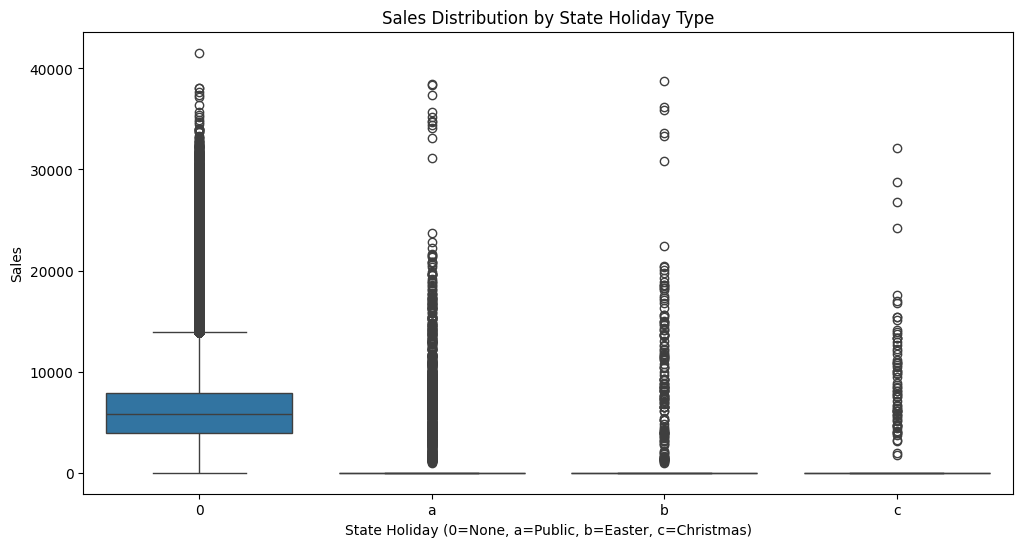

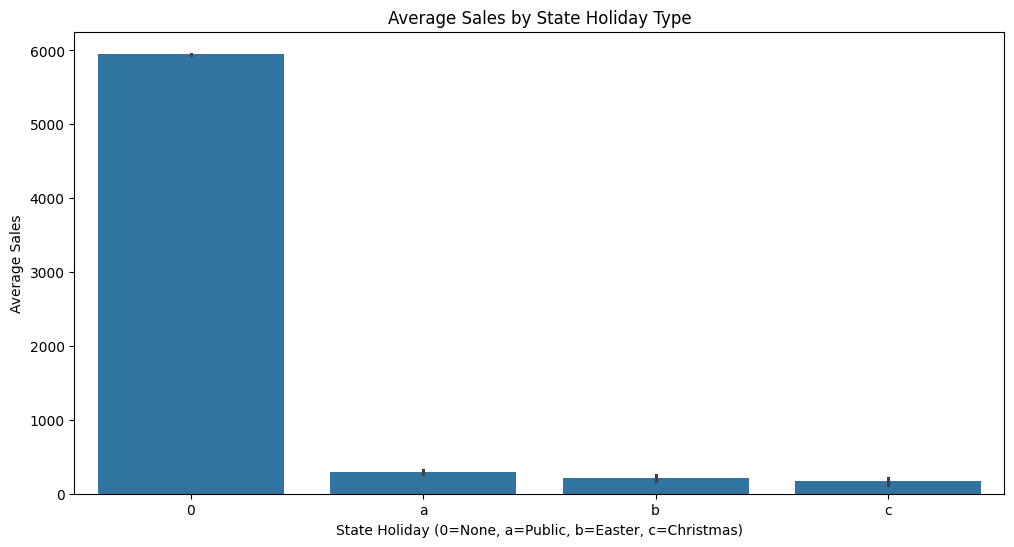

In [27]:
# Create boxplot to show sales distribution by StateHoliday
plt.figure(figsize=(12, 6))
sns.boxplot(data=merged_df, x='StateHoliday', y='Sales')
plt.title('Sales Distribution by State Holiday Type')
plt.xlabel('State Holiday (0=None, a=Public, b=Easter, c=Christmas)')
plt.ylabel('Sales')
plt.show()

# Create barplot to show average sales by StateHoliday
plt.figure(figsize=(12, 6))
sns.barplot(data=merged_df, x='StateHoliday', y='Sales')
plt.title('Average Sales by State Holiday Type')
plt.xlabel('State Holiday (0=None, a=Public, b=Easter, c=Christmas)')
plt.ylabel('Average Sales')
plt.show()

In [28]:
merged_df = merged_df.drop('PromoInterval', axis=1)
merged_df.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear
0,1,5,2015-07-31,5263,555,1,1,0,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0
1,2,5,2015-07-31,6064,625,1,1,0,1,a,a,570.0,11.0,2007.0,1,13.0,2010.0
2,3,5,2015-07-31,8314,821,1,1,0,1,a,a,14130.0,12.0,2006.0,1,14.0,2011.0
3,4,5,2015-07-31,13995,1498,1,1,0,1,c,c,620.0,9.0,2009.0,0,0.0,0.0
4,5,5,2015-07-31,4822,559,1,1,0,1,a,a,29910.0,4.0,2015.0,0,0.0,0.0


In [29]:
merged_df['StoreType'] = merged_df['StoreType'].map({'a': 0, 'b': 1, 'c': 2, 'd': 3})
merged_df['Assortment'] = merged_df['Assortment'].map({'a': 0, 'b': 1, 'c': 2})


numeric_columns = merged_df.select_dtypes(include=['int64', 'float64']).columns
for col in numeric_columns:
    merged_df[col] = merged_df[col].astype('float64')

print("\nUpdated datatypes:")
print(merged_df.dtypes)


Updated datatypes:
Store                        float64
DayOfWeek                    float64
Date                          object
Sales                        float64
Customers                    float64
Open                         float64
Promo                        float64
StateHoliday                  object
SchoolHoliday                float64
StoreType                    float64
Assortment                   float64
CompetitionDistance          float64
CompetitionOpenSinceMonth    float64
CompetitionOpenSinceYear     float64
Promo2                       float64
Promo2SinceWeek              float64
Promo2SinceYear              float64
dtype: object


In [30]:
from datetime import datetime

# Convert Date to datetime and extract numerical features
merged_df['Date'] = pd.to_datetime(merged_df['Date'])

# Extract date components as numerical features
merged_df['Year'] = merged_df['Date'].dt.year
merged_df['Month'] = merged_df['Date'].dt.month
merged_df['Day'] = merged_df['Date'].dt.day

# Convert to float64
merged_df['Year'] = merged_df['Year'].astype('float64')
merged_df['Month'] = merged_df['Month'].astype('float64')
merged_df['Day'] = merged_df['Day'].astype('float64')

# Drop original Date column
merged_df = merged_df.drop('Date', axis=1)

print("Date features created. New columns datatypes:")
print(merged_df[['Year', 'Month', 'Day']].dtypes)

Date features created. New columns datatypes:
Year     float64
Month    float64
Day      float64
dtype: object


In [31]:
merged_df.isnull().sum()

,0
Store,0
DayOfWeek,0
Sales,0
Customers,0
Open,0
Promo,0
StateHoliday,0
SchoolHoliday,0
StoreType,0
Assortment,0


In [32]:
merged_df.columns

Index(['Store', 'DayOfWeek', 'Sales', 'Customers', 'Open', 'Promo',
       'StateHoliday', 'SchoolHoliday', 'StoreType', 'Assortment',
       'CompetitionDistance', 'CompetitionOpenSinceMonth',
       'CompetitionOpenSinceYear', 'Promo2', 'Promo2SinceWeek',
       'Promo2SinceYear', 'Year', 'Month', 'Day'],
      dtype='object')

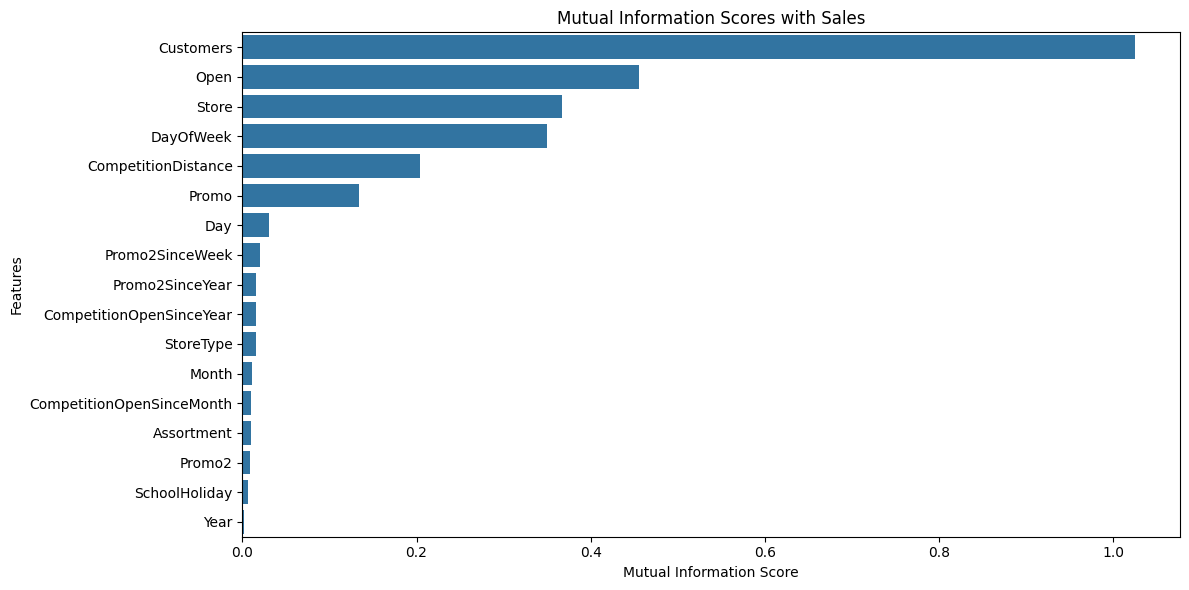


Mutual Information Scores:
                      Feature  Mutual Information
2                   Customers            1.025555
3                        Open            0.455075
0                       Store            0.366527
1                   DayOfWeek            0.349302
8         CompetitionDistance            0.204200
4                       Promo            0.133865
16                        Day            0.030834
12            Promo2SinceWeek            0.020160
13            Promo2SinceYear            0.016087
10   CompetitionOpenSinceYear            0.015253
6                   StoreType            0.015238
15                      Month            0.010941
9   CompetitionOpenSinceMonth            0.010292
7                  Assortment            0.009933
11                     Promo2            0.008246
5               SchoolHoliday            0.006245
14                       Year            0.001999


In [33]:
from sklearn.feature_selection import mutual_info_regression

# Update numeric columns list (removing Date and adding new date features)
numeric_columns = ['Store', 'DayOfWeek', 'Customers', 'Open', 'Promo',
       'SchoolHoliday', 'StoreType', 'Assortment', 'CompetitionDistance',
       'CompetitionOpenSinceMonth', 'CompetitionOpenSinceYear', 'Promo2',
       'Promo2SinceWeek', 'Promo2SinceYear', 'Year', 'Month', 'Day']

X = merged_df[numeric_columns]
y = merged_df['Sales']

# Calculate mutual information scores
mi_scores = mutual_info_regression(X, y)

# Create dataframe with scores
mi_df = pd.DataFrame({
    'Feature': numeric_columns,
    'Mutual Information': mi_scores
})

mi_df = mi_df.sort_values('Mutual Information', ascending=False)

# Plot results
plt.figure(figsize=(12, 6))
sns.barplot(data=mi_df, x='Mutual Information', y='Feature')
plt.title('Mutual Information Scores with Sales')
plt.xlabel('Mutual Information Score')
plt.ylabel('Features')
plt.tight_layout()
plt.show()

print("\nMutual Information Scores:")
print(mi_df)

In [34]:
test.columns

Index(['Id', 'Store', 'DayOfWeek', 'Date', 'Open', 'Promo', 'StateHoliday',
       'SchoolHoliday'],
      dtype='object')

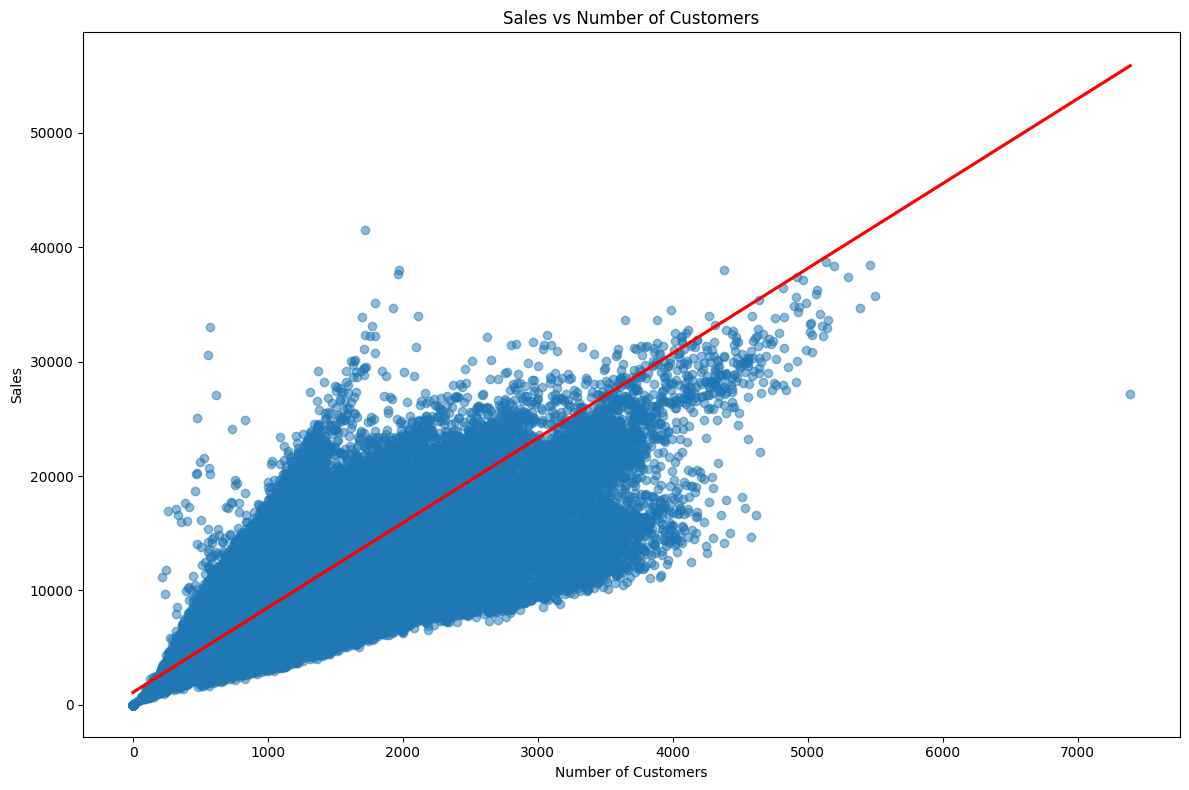


Correlation coefficient between Sales and Customers: 0.8947


In [35]:
# Create scatter plot with regression line
plt.figure(figsize=(12, 8))
sns.regplot(data=merged_df, x='Customers', y='Sales', scatter_kws={'alpha':0.5}, line_kws={'color': 'red'})
plt.title('Sales vs Number of Customers')
plt.xlabel('Number of Customers')
plt.ylabel('Sales')
plt.tight_layout()
plt.show()

# Calculate and print correlation coefficient
correlation = merged_df['Sales'].corr(merged_df['Customers'])
print(f"\nCorrelation coefficient between Sales and Customers: {correlation:.4f}")

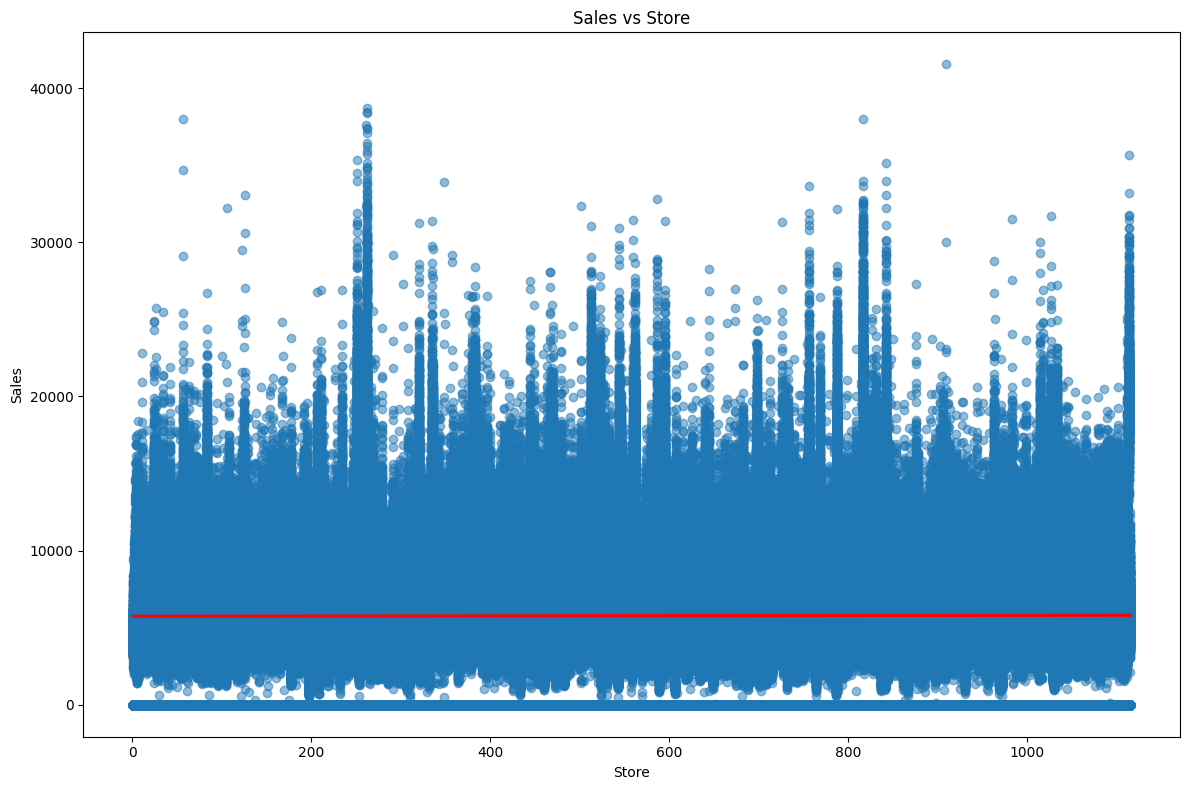


Correlation coefficient between Sales and Store: 0.0051


In [36]:
# Create scatter plot with regression line
plt.figure(figsize=(12, 8))
sns.regplot(data=merged_df, x='Store', y='Sales', scatter_kws={'alpha':0.5}, line_kws={'color': 'red'})
plt.title('Sales vs Store')
plt.xlabel('Store')
plt.ylabel('Sales')
plt.tight_layout()
plt.show()

# Calculate and print correlation coefficient
correlation = merged_df['Sales'].corr(merged_df['Store'])
print(f"\nCorrelation coefficient between Sales and Store: {correlation:.4f}")

In [37]:
from datetime import datetime

# Convert Date to datetime and extract numerical features
test['Date'] = pd.to_datetime(test['Date'])

# Extract date components as numerical features
test['Year'] = test['Date'].dt.year
test['Month'] = test['Date'].dt.month
test['Day'] = test['Date'].dt.day

# Convert to float64
test['Year'] = test['Year'].astype('float64')
test['Month'] = test['Month'].astype('float64')
test['Day'] = test['Day'].astype('float64')

# Drop original Date column
test = test.drop('Date', axis=1)

print("Date features created. New columns datatypes:")
print(test[['Year', 'Month', 'Day']].dtypes)

Date features created. New columns datatypes:
Year     float64
Month    float64
Day      float64
dtype: object


In [38]:
test.columns

Index(['Id', 'Store', 'DayOfWeek', 'Open', 'Promo', 'StateHoliday',
       'SchoolHoliday', 'Year', 'Month', 'Day'],
      dtype='object')

In [39]:
features = ['Store', 'DayOfWeek', 'Open', 'Promo', 'StateHoliday',
       'SchoolHoliday', 'Year', 'Month', 'Day', 'Sales']

In [40]:
merged_df = merged_df[features]

In [41]:
merged_df

,Store,DayOfWeek,Open,Promo,StateHoliday,SchoolHoliday,Year,Month,Day,Sales
0,1.0,5.0,1.0,1.0,0,1.0,2015.0,7.0,31.0,5263.0
1,2.0,5.0,1.0,1.0,0,1.0,2015.0,7.0,31.0,6064.0
2,3.0,5.0,1.0,1.0,0,1.0,2015.0,7.0,31.0,8314.0
3,4.0,5.0,1.0,1.0,0,1.0,2015.0,7.0,31.0,13995.0
4,5.0,5.0,1.0,1.0,0,1.0,2015.0,7.0,31.0,4822.0
...,...,...,...,...,...,...,...,...,...,...
1017204,1111.0,2.0,0.0,0.0,a,1.0,2013.0,1.0,1.0,0.0
1017205,1112.0,2.0,0.0,0.0,a,1.0,2013.0,1.0,1.0,0.0
1017206,1113.0,2.0,0.0,0.0,a,1.0,2013.0,1.0,1.0,0.0
1017207,1114.0,2.0,0.0,0.0,a,1.0,2013.0,1.0,1.0,0.0


In [42]:
merged_df.dtypes

,0
Store,float64
DayOfWeek,float64
Open,float64
Promo,float64
StateHoliday,object
SchoolHoliday,float64
Year,float64
Month,float64
Day,float64
Sales,float64


In [43]:
from sklearn.preprocessing import LabelEncoder

# Find object columns
object_columns = merged_df.select_dtypes(include=['object']).columns
print("\nObject columns to convert:", object_columns.tolist())

# Apply label encoding to object columns
le = LabelEncoder()
for col in object_columns:
    merged_df[col] = le.fit_transform(merged_df[col].astype(str))



Object columns to convert: ['StateHoliday']


In [44]:
merged_df.isnull().sum()

,0
Store,0
DayOfWeek,0
Open,0
Promo,0
StateHoliday,0
SchoolHoliday,0
Year,0
Month,0
Day,0
Sales,0


In [45]:
test.isnull().sum()

,0
Id,0
Store,0
DayOfWeek,0
Open,11
Promo,0
StateHoliday,0
SchoolHoliday,0
Year,0
Month,0
Day,0


In [46]:
test.isnull().sum()

,0
Id,0
Store,0
DayOfWeek,0
Open,11
Promo,0
StateHoliday,0
SchoolHoliday,0
Year,0
Month,0
Day,0


In [47]:
test.dtypes

,0
Id,int64
Store,int64
DayOfWeek,int64
Open,float64
Promo,int64
StateHoliday,object
SchoolHoliday,int64
Year,float64
Month,float64
Day,float64


In [48]:

# Fix StateHoliday column
test['StateHoliday'] = test['StateHoliday'].map({'0': 0, 'a': 1, 'b': 2, 'c': 3})
test['StateHoliday'] = test['StateHoliday'].astype('float64')

# Verify the changes
print("Datatypes after conversion:")
print(test[['Open', 'StateHoliday']].dtypes)

Datatypes after conversion:
Open            float64
StateHoliday    float64
dtype: object


In [49]:
test['Open'] = test['Open'].map({1.0:1, 0.0:0})

In [50]:
test.dtypes

,0
Id,int64
Store,int64
DayOfWeek,int64
Open,float64
Promo,int64
StateHoliday,float64
SchoolHoliday,int64
Year,float64
Month,float64
Day,float64


In [51]:
test.isnull().sum()

,0
Id,0
Store,0
DayOfWeek,0
Open,11
Promo,0
StateHoliday,0
SchoolHoliday,0
Year,0
Month,0
Day,0


In [52]:
test['Open'] = test['Open'].fillna(test['Open'].mode)

In [53]:
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Split training data
X = merged_df.drop('Sales', axis=1)
y = merged_df['Sales']

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train XGBoost model
xgb_model = XGBRegressor(
    n_estimators=1000,
    learning_rate=0.05,
    max_depth=7,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42
)

# Train the model
xgb_model.fit(
    X_train, y_train,
    eval_set=[(X_val, y_val)],
    verbose=100
)

# Make predictions on validation set
val_preds = xgb_model.predict(X_val)

# Evaluate model
print("\nValidation Metrics:")
# print(f"RMSE: {mean_square_error(y_val, val_preds, squared=False):.2f}")
print(f"MAE: {mean_absolute_error(y_val, val_preds):.2f}")
print(f"R2 Score: {r2_score(y_val, val_preds):.4f}")

[0]	validation_0-rmse:3746.45069
[100]	validation_0-rmse:2341.52145
[200]	validation_0-rmse:2245.88248
[300]	validation_0-rmse:2210.56830
[400]	validation_0-rmse:2194.14774
[500]	validation_0-rmse:2185.39505
[600]	validation_0-rmse:2180.23228
[700]	validation_0-rmse:2177.75715
[800]	validation_0-rmse:2176.72968
[900]	validation_0-rmse:2176.18408
[999]	validation_0-rmse:2176.49448

Validation Metrics:
MAE: 1458.18
R2 Score: 0.6797


In [54]:
features = ['Store', 'DayOfWeek', 'Open', 'Promo', 'StateHoliday',
            'SchoolHoliday', 'Year', 'Month', 'Day']
test = test[features]

In [55]:
test.isnull().sum()

,0
Store,0
DayOfWeek,0
Open,0
Promo,0
StateHoliday,0
SchoolHoliday,0
Year,0
Month,0
Day,0


In [58]:
test['Open'] = test['Open'].map({1.0:1, 0.0:0})

In [59]:
test.dtypes

,0
Store,int64
DayOfWeek,int64
Open,float64
Promo,int64
StateHoliday,float64
SchoolHoliday,int64
Year,float64
Month,float64
Day,float64


In [61]:
features = ['Store', 'DayOfWeek', 'Open', 'Promo', 'StateHoliday',
           'SchoolHoliday', 'Year', 'Month', 'Day']

X_test = test[features].copy()

for col in X_test.columns:
    X_test[col] = X_test[col].astype('float64')

test_predictions = xgb_model.predict(X_test)

submission_df = pd.DataFrame({
    'Id': range(1, len(test_predictions) + 1),  # Creates sequence 1, 2, 3, ...
    'Sales': test_predictions
})

# Save predictions
submission_df.to_csv('xgboost_predictions.csv', index=False)

print("Number of predictions:", len(test_predictions))
print("\nFirst few rows of submission file:")
print(submission_df.head())

Number of predictions: 41088

First few rows of submission file:
   Id        Sales
0   1  6202.494629
1   2  6202.494629
2   3  6944.807617
3   4  6944.807617
4   5  6944.807617
